# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [184]:
#import things

import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
import json
from pprint import pprint
from scipy.stats import linregress

#import api keys
from config import weather_api_key

#import API from citypy
from citipy import citipy


## Generate Cities List

In [13]:
#create lists for cities
#need to get latitude/longitude for cities
lat_lng = []
cities = []

#create an array of random numbers, saw that np.random.uniform might give me the best results, given a range from 
#latitude and longitude, used 500 since the HW calls for 500 samples? 
#nevermind, the size needed to be bigger.
lat = np.random.uniform(low=-90.00, high=90.00, size = 1200)
lng = np.random.uniform(low=-180.00, high=180.00, size = 1200)
lat_lng = list(zip(lat, lng))

for i in lat_lng:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)

# print(cities)

cities_df = pd.DataFrame({"city": cities})

cities_df['lat'] = ''
cities_df['lng'] = ''
cities_df['Max Temp'] = ''
cities_df['Humidity'] = ''
cities_df['Cloudiness'] = ''
cities_df['Wind Speed'] = ''
cities_df['Country'] = ''
cities_df['Date'] = ''

cities_df.head()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la malbaie,,,,,,,,
1,albany,,,,,,,,
2,geri,,,,,,,,
3,kavaratti,,,,,,,,
4,puerto ayora,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
#create base API url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query = f"{base_url}appid={weather_api_key}&units={units}&q="

#create counts for recrds & sets 
record = 1
set = 1

print(f'Beginning Data Retrieval\n'
         f'-----------------------------')

#create 
for index, row in cities_df.iterrows():
       
    city = row['city']
    
    response = requests.get(query + city).json()
   
    print(f'Processing Record {record} of Set {set} | {city}')
    
    if record < 51:
        record += 1
        set = 1
    if record > 50 and record < 101:
        record = 1
        record += 1
        set += 1
    
#     while record < 51:
#         record += 1 
#         set = 1
    
    try:
        cities_df.loc[index, 'lat'] = response['coord']['lat']
        cities_df.loc[index, 'lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp']= response['main']['temp_max']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
    
    except (KeyError):
        print("City not found. Skipping...")

print(f'-----------------------------\n'
     f'Data Retrieval Complete\n'
     f'-----------------------------\n')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | la malbaie
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | geri
Processing Record 4 of Set 1 | kavaratti
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | takoradi
Processing Record 7 of Set 1 | paris
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | gondar
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | luau
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | margate
Processing Record 17 of Set 1 | beinamar
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | burgeo
Processing Record 22 of Set 1 | mataura

Processing Record 38 of Set 1 | sibu
Processing Record 39 of Set 1 | alice town
Processing Record 40 of Set 1 | paamiut
Processing Record 41 of Set 1 | eskasem
City not found. Skipping...
Processing Record 42 of Set 1 | saint george
Processing Record 43 of Set 1 | mocuba
Processing Record 44 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 45 of Set 1 | jamestown
Processing Record 46 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 47 of Set 1 | kazachinskoye
Processing Record 48 of Set 1 | anito
Processing Record 49 of Set 1 | manokwari
Processing Record 50 of Set 1 | ayorou
Processing Record 2 of Set 2 | grindavik
Processing Record 3 of Set 1 | nantucket
Processing Record 4 of Set 1 | santa isabel do rio negro
Processing Record 5 of Set 1 | gelibolu
Processing Record 6 of Set 1 | alanya
Processing Record 7 of Set 1 | portland
Processing Record 8 of Set 1 | nivala
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | meha

Processing Record 33 of Set 1 | fairbanks
Processing Record 34 of Set 1 | honiara
Processing Record 35 of Set 1 | kandrian
Processing Record 36 of Set 1 | markova
Processing Record 37 of Set 1 | pathanamthitta
Processing Record 38 of Set 1 | kieta
Processing Record 39 of Set 1 | ituiutaba
Processing Record 40 of Set 1 | yenangyaung
Processing Record 41 of Set 1 | saldus
Processing Record 42 of Set 1 | abaza
Processing Record 43 of Set 1 | villa carlos paz
Processing Record 44 of Set 1 | yichun
Processing Record 45 of Set 1 | rocha
Processing Record 46 of Set 1 | khani
Processing Record 47 of Set 1 | cap malheureux
Processing Record 48 of Set 1 | ambilobe
Processing Record 49 of Set 1 | kelowna
Processing Record 50 of Set 1 | comodoro rivadavia
Processing Record 2 of Set 2 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 1 | muroto
Processing Record 4 of Set 1 | le port
Processing Record 5 of Set 1 | morant bay
Processing Record 6 of Set 1 | megion
Processing Record 

In [15]:
#homework example 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [122]:
cities_df.to_csv("WeatherPy.csv", index=False)

cities_df.head()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la malbaie,47.66,-70.16,54,83,39,1.99,CA,1599868830
1,albany,42.6,-73.97,60.01,74,0,4.61,US,1599868817
2,geri,35.1,33.42,78.01,88,20,4.7,CY,1599868831
3,kavaratti,10.57,72.64,81.34,79,98,19.84,IN,1599868565
4,puerto ayora,-0.74,-90.35,68,90,83,7,EC,1599868831


In [104]:
summary_stats = cities_df[['lat', 'lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]

# perc = [.25, .5, .75]

# #include certain dtypes
# include = ['object', 'float', 'int']

# summary_stats.describe(percentiles = perc, include = include)

count = summary_stats.count()

print(count)

mean = summary_stats.mean(axis=0)
#okay so we can see here that the mean has no values

#check to see what type of data is in the DF, all object, will need to convert
summary_stats.dtypes

#alright, i guess we'll need ot convert each column to numeric, will see if there's an easier way later 
#latitude
lat = pd.to_numeric(summary_stats['lat'])
lat_stat = lat.describe()
print(lat_stat)

#longitude
lng = pd.to_numeric(summary_stats['lng'])
lng_stat = lng.describe()
print(lng_stat)

#max temp
mxtemp = pd.to_numeric(summary_stats['Max Temp'])
mxtemp_stat = mxtemp.describe()
print(mxtemp_stat)

#humidity
hum = pd.to_numeric(summary_stats['Humidity'])
hum_stat = hum.describe()
print(hum_stat)

#cloudiness
cloud = pd.to_numeric(summary_stats['Cloudiness'])
cloud_stat = cloud.describe()
print(cloud_stat)

#wind speed
wind = pd.to_numeric(summary_stats['Wind Speed'])
wind_stat = wind.describe()
print(wind_stat)

#date
date = pd.to_numeric(summary_stats['Date'])
date_stat = date.describe()
print(date_stat)


# df1 = pd.concat([lat_stat, lng_stat], axis = 1)
# df2 = pd.concat([mxtemp_stat, hum_stat], axis = 1)
# df3 = pd.concat([cloud_stat, wind_stat], axis = 1)

# df1

pd.DataFrame({'lat': lat_stat,
             'lng': lng_stat,
             'Max Temp': mxtemp_stat,
             'Humidity': hum_stat,
             'Cloudiness': cloud_stat,
             'Wind Speed': wind_stat,
             'Date': date_stat})



lat           529
lng           529
Max Temp      529
Humidity      529
Cloudiness    529
Wind Speed    529
Date          529
dtype: int64
count    485.00000
mean      18.98534
std       33.70581
min      -54.80000
25%       -9.66000
50%       20.52000
75%       47.70000
max       78.22000
Name: lat, dtype: float64
count    485.000000
mean      15.850021
std       89.671134
min     -179.170000
25%      -63.260000
50%       18.420000
75%       93.280000
max      179.320000
Name: lng, dtype: float64
count    485.000000
mean      65.820639
std       14.365015
min       29.980000
25%       54.000000
50%       67.930000
75%       78.800000
max      100.170000
Name: Max Temp, dtype: float64
count    485.000000
mean      72.280412
std       18.590513
min        9.000000
25%       63.000000
50%       77.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64
count    485.000000
mean      48.824742
std       37.161422
min        0.000000
25%        9.000000
50%       50.00

,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,485.00000,485.000000,485.000000,485.000000,485.000000,485.000000,4.850000e+02
mean,18.98534,15.850021,65.820639,72.280412,48.824742,7.307052,1.599869e+09
std,33.70581,89.671134,14.365015,18.590513,37.161422,4.987692,9.631728e+01
min,-54.80000,-179.170000,29.980000,9.000000,0.000000,0.220000,1.599869e+09
25%,-9.66000,-63.260000,54.000000,63.000000,9.000000,3.530000,1.599869e+09
50%,20.52000,18.420000,67.930000,77.000000,50.000000,6.400000,1.599869e+09
75%,47.70000,93.280000,78.800000,86.000000,88.000000,9.530000,1.599869e+09
max,78.22000,179.320000,100.170000,100.000000,100.000000,32.440000,1.599869e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [278]:
cities_df.dtypes

# humid = pd.to_numeric(cities_df['Humidity'])

# data = humid > 100

# wayhumid = humid.loc[humid > 100]

# print(wayhumid)

# print(data)

#i guess there isn't any cities that have humidity over 100%

#check datatype of column
cities_df['Humidity'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Humidity'])

#set these to variables to make it easier 
humid = pd.to_numeric(cities_df['Humidity']) 


#set this to a df
hdf = pd.DataFrame({"City": cities,
             'Humidity': humid})

hdf.head()

#gather all of the humidity above 100
omg = hdf[hdf['Humidity'] > 100]

omg

#i guess there isn't any cities that have humidity over 100%

,City,Humidity


In [279]:
#  Get the indices of cities that have humidity over 100%.


In [280]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [281]:
cities_df


,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la malbaie,47.66,-70.16,54,83,39,1.99,CA,1599868830
1,albany,42.6,-73.97,60.01,74,0,4.61,US,1599868817
2,geri,35.1,33.42,78.01,88,20,4.7,CY,1599868831
3,kavaratti,10.57,72.64,81.34,79,98,19.84,IN,1599868565
4,puerto ayora,-0.74,-90.35,68,90,83,7,EC,1599868831
...,...,...,...,...,...,...,...,...,...
524,pasan,22.85,82.2,74.03,91,100,0.45,IN,1599868967
525,half moon bay,37.46,-122.43,77,53,90,8.05,US,1599868967
526,saiha,22.48,92.97,71.91,94,99,1.3,IN,1599868967
527,chernyshevskiy,63.01,112.47,46.33,85,99,1.41,RU,1599868967


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

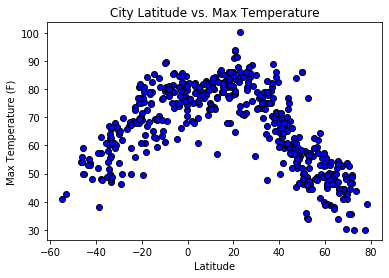

In [283]:
#check dataype of column
cities_df['Max Temp'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Max Temp'])
pd.to_numeric(cities_df['lat'])

#start plotting by getting the values
maxtemp = pd.to_numeric(cities_df['Max Temp'])
latitude = pd.to_numeric(cities_df['lat'])

plt.scatter(latitude, maxtemp, marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')

plt.savefig('CityLatvsMaxTemp')


## Latitude vs. Humidity Plot

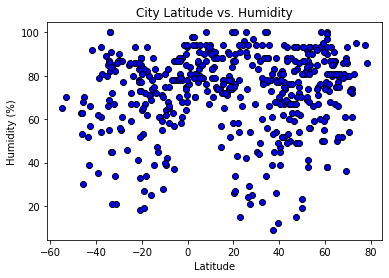

In [297]:
#check datatype of column
cities_df['lat'].dtype
cities_df['Humidity'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['lat'])
pd.to_numeric(cities_df['Humidity'])

#start plotting by getting the values
lats = pd.to_numeric(cities_df['lat'])
humidity = pd.to_numeric(cities_df['Humidity'])

plt.scatter(lats, humidity, marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

plt.savefig('CityLatvsHumidity')

## Latitude vs. Cloudiness Plot

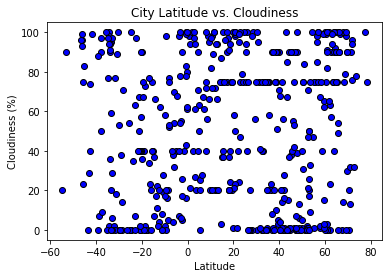

In [298]:
#check datatype of column
cities_df['lat'].dtype
cities_df['Cloudiness'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['lat'])
pd.to_numeric(cities_df['Cloudiness'])

#start plotting by getting the values
lat = pd.to_numeric(cities_df['lat'])
cloudiness = pd.to_numeric(cities_df['Cloudiness'])

plt.scatter(lat, cloudiness, marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')

plt.savefig('CityLatvsCloudiness')

## Latitude vs. Wind Speed Plot

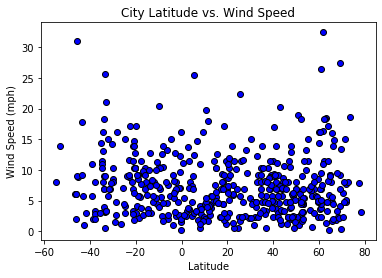

In [286]:
#check datatype of column
cities_df['lat'].dtype
cities_df['Wind Speed'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['lat'])
pd.to_numeric(cities_df['Wind Speed'])

#start plotting by getting the values
lat = pd.to_numeric(cities_df['lat'])
windsp = pd.to_numeric(cities_df['Wind Speed'])

plt.scatter(lat, windsp, marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')

plt.savefig('CityLatvsWindSpeed')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6803889887132858


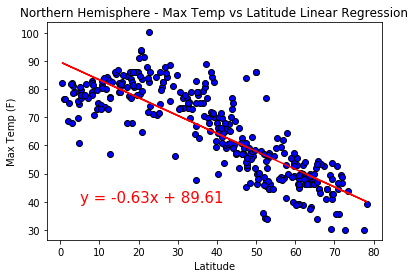

In [291]:
#check datatype of column
cities_df['Max Temp'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Max Temp'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
maxtemp = pd.to_numeric(cities_df['Max Temp']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"max temp": maxtemp,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
north = new[new['latitude'] > 0]

north['max temp'].dtype

plt.scatter(north['latitude'], north['max temp'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere - Max Temp vs Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['latitude'], north['max temp'])

#calculate predictions for each latitude
regress_values = north['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(north['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (5, 40), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('NHMaxTempvsLatitude')


The relationship between the Northern Hemisphere and the Max Temperature is a negative correlation. As the equator line moves further north, the maximum temperature starts to fall. It is interesting to also see the outliers on both ends of the regression line for that day. As the equator moves up north, the outliers actually start going under the line instead of above the line. We can see because the line has a slope, there is a linear relationship between the two, which is further confirmed by the r-value as well, which is close to 1.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6126777739719099


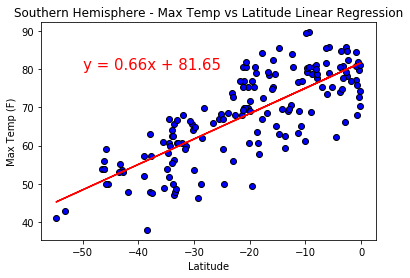

In [292]:
#check datatype of column
cities_df['Max Temp'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Max Temp'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
maxtemp = pd.to_numeric(cities_df['Max Temp']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"max temp": maxtemp,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
south = new[new['latitude'] < 0]

south['max temp'].dtype

plt.scatter(south['latitude'], south['max temp'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Max Temp vs Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['latitude'], south['max temp'])

#calculate predictions for each latitude
regress_values = south['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(south['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('SHMaxTempvsLatitude')

Conversely, in the Southern Hemisphere, we can see that there is a general progression of maximum temperatures as the line of the equation moves closer to 0 degress latitude. Here, we can also see there is a linear relationship as well. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00300594195128827


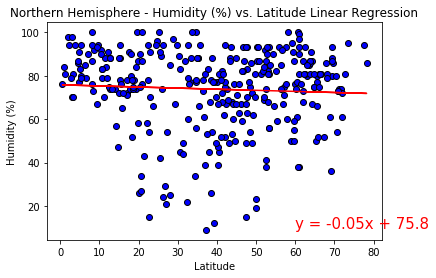

In [293]:
#check datatype of column
cities_df['Humidity'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Humidity'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
humidity = pd.to_numeric(cities_df['Humidity']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"Humidity": humidity,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
north = new[new['latitude'] > 0]

north['Humidity'].dtype

plt.scatter(north['latitude'], north['Humidity'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['latitude'], north['Humidity'])

#calculate predictions for each latitude
regress_values = north['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(north['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (60, 10), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('NHHumidityvsLatitude')

Based on the data and scatterplot, we can see that the humidity levels and the latitude location are all over the place. There isn't much of a slope on the linear regression, and the r-value is low, meaning the likelihood of a relationship between the two values is low or non-existent. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.008261124861540035


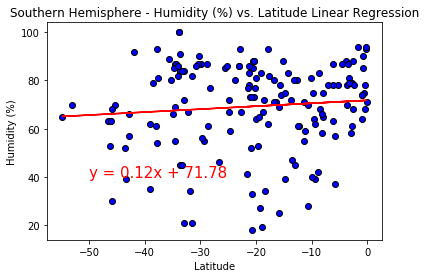

In [294]:
#check datatype of column
cities_df['Humidity'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Humidity'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
humidity = pd.to_numeric(cities_df['Humidity']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"Humidity": humidity,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
south = new[new['latitude'] < 0]

south['Humidity'].dtype

plt.scatter(south['latitude'], south['Humidity'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['latitude'], south['Humidity'])

#calculate predictions for each latitude
regress_values = south['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(south['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (-50, 40), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('SHHumidityvsLatitude')

In this plot, we can see that there's more of a correlation between humidity levels and the latitude as it rises from the Southern Hemisphere to the equator. We can see less of a spread of data when the latitude gets closer to the equator. While low, the r-value when compared to the Northern Hemisphere, is higher in value. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.003577987871927448


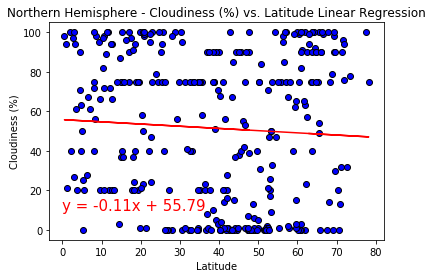

In [295]:
#check datatype of column
cities_df['Cloudiness'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Cloudiness'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
cloud = pd.to_numeric(cities_df['Cloudiness']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"Cloudiness": cloud,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
north = new[new['latitude'] > 0]

north['Cloudiness'].dtype

plt.scatter(north['latitude'], north['Cloudiness'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['latitude'], north['Cloudiness'])

#calculate predictions for each latitude
regress_values = north['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(north['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (0, 10), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('NHCloudinessvsLatitude')

When observing the data between the latitude progression from the equator to the North Pole and the percentage of cloudiness, we can see that there is not a lot of correlation between the two. This suggests that there might not be a direct relationship between the city location and how cloudy it might be that day. There could be several factors that may affect this above the latitudinal location - inclement weather, seasons, all which have a more direct effect on cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00865203787162531


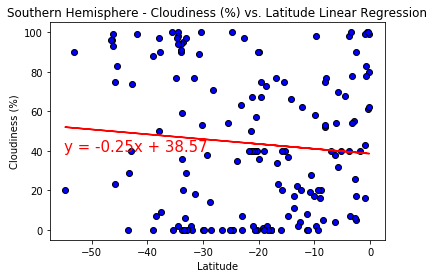

In [296]:
#check datatype of column
cities_df['Cloudiness'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Cloudiness'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
cloud = pd.to_numeric(cities_df['Cloudiness']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"Cloudiness": cloud,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
south = new[new['latitude'] < 0]

south['Cloudiness'].dtype

plt.scatter(south['latitude'], south['Cloudiness'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['latitude'], south['Cloudiness'])

#calculate predictions for each latitude
regress_values = south['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(south['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (-55, 40), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('SHCloudinessvsLatitude')

This is very similar when comparing North and South and Cloudiness. With the Southern Hemisphere, there seems to be a more defined relationship than the Northern Hemisphere. It might be because when moving closer to the equator, temperatures tend to be much more humid, which can affect rain and cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.008986331602281069


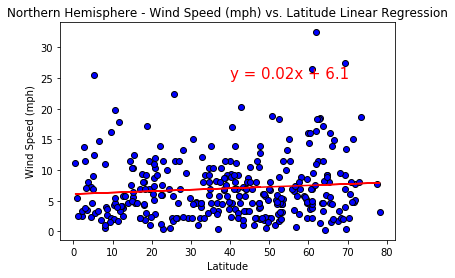

In [299]:
#check datatype of column
cities_df['Wind Speed'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Wind Speed'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
wind = pd.to_numeric(cities_df['Wind Speed']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"Wind Speed": wind,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
north = new[new['latitude'] > 0]

north['Wind Speed'].dtype

plt.scatter(north['latitude'], north['Wind Speed'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['latitude'], north['Wind Speed'])

#calculate predictions for each latitude
regress_values = north['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(north['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (40, 25), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('NHWindSpeedvsLatitude')

We can see from this plot that the majority of the data seems to stay in a low wind speed, regardless of the latitudinal location of the cities. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.022405004757829035


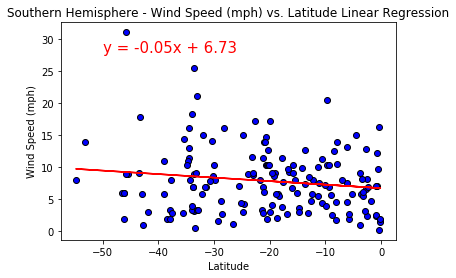

In [300]:
#check datatype of column
cities_df['Wind Speed'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Wind Speed'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
wind = pd.to_numeric(cities_df['Wind Speed']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"Wind Speed": wind,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
south = new[new['latitude'] < 0]

south['Wind Speed'].dtype

plt.scatter(south['latitude'], south['Wind Speed'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['latitude'], south['Wind Speed'])

#calculate predictions for each latitude
regress_values = south['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(south['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (-50, 28), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('SHWindSpeedvsLatitude')

In this plot, we can see there seems to be more data that is not clustered around the linear regression line and around each other. Similar to the Northern Hemisphere, there does not seem to have a direct relationship between wind speed and latitudinal location moving closer to the equator, but the r value is more than twice the value of the r-value belonging to the N. Hemisphere. This may suggest taht there is more of a relationship of windspeed moving closer to the equator, than moving away from the equator.